<a href="https://colab.research.google.com/github/Haikal7090/DSA_Eruditio/blob/main/DSA_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
!pip install gdown
!gdown --fuzzy "https://drive.google.com/file/d/1BN8Jiypz-fCpCO797jldTfQldPIGOJTi/view?usp=sharing"
!gdown --fuzzy "https://drive.google.com/file/d/1sJUJMQA_2b50yvF4WEGsWvlUrADzVUJz/view?usp=sharing"


Downloading...
From: https://drive.google.com/uc?id=1BN8Jiypz-fCpCO797jldTfQldPIGOJTi
To: /content/train.csv
100% 1.85M/1.85M [00:00<00:00, 206MB/s]
Downloading...
From: https://drive.google.com/uc?id=1sJUJMQA_2b50yvF4WEGsWvlUrADzVUJz
To: /content/test.csv
100% 511k/511k [00:00<00:00, 100MB/s]


In [3]:
# Membaca file CSV

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')


In [ ]:
df_train.head()

,ID,date,cluster_id,electricity_consumption,temperature_2m_max,temperature_2m_min,apparent_temperature_max,apparent_temperature_min,sunshine_duration,daylight_duration,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration
0,cluster_1_2014-01-01,2014-01-01,cluster_1,358.032,10.8,4.2,5.5,0.4,53.003333,29787.533333,40.6,79.2,186.000000,1.176667,0.483333
1,cluster_2_2014-01-01,2014-01-01,cluster_2,548.247,12.2,4.3,8.6,-0.4,8195.656667,30650.350000,36.0,81.7,170.591118,3.383333,0.736667
2,cluster_3_2014-01-01,2014-01-01,cluster_3,758.303,12.9,-0.8,10.1,-4.9,16305.260000,31547.686667,20.9,44.3,159.467752,3.880000,0.716667
3,cluster_4_2014-01-01,2014-01-01,cluster_4,1072.077,10.8,4.7,6.7,0.6,9224.803333,30769.220000,34.7,82.8,184.339753,3.153333,0.676667
4,cluster_1_2014-01-02,2014-01-02,cluster_1,386.908,10.7,7.0,6.6,3.3,22372.000000,29850.226667,34.3,75.2,210.333465,3.640000,0.780000


In [ ]:
df_test.head()

,ID,date,cluster_id,temperature_2m_max,temperature_2m_min,apparent_temperature_max,apparent_temperature_min,sunshine_duration,daylight_duration,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration
0,cluster_1_2022-01-01,2022-01-01,cluster_1,15.2,7.9,14.2,5.2,21902.986667,29784.506667,22.2,37.8,172.732245,4.173333,0.780000
1,cluster_2_2022-01-01,2022-01-01,cluster_2,15.9,4.1,15.3,1.3,23550.080000,30647.540000,22.7,38.5,163.972679,5.146667,0.730000
2,cluster_3_2022-01-01,2022-01-01,cluster_3,18.6,4.9,18.8,1.8,24179.643333,31545.103333,15.5,26.3,198.645137,5.713333,0.730000
3,cluster_4_2022-01-01,2022-01-01,cluster_4,13.3,3.9,11.9,1.3,23839.203333,30766.446667,16.1,27.4,183.517316,4.200000,0.486667
4,cluster_1_2022-01-02,2022-01-02,cluster_1,14.1,8.1,11.2,5.3,21018.193333,29847.110000,34.4,59.4,223.335840,4.030000,1.170000


In [4]:
# Mengecek dan mengganti nilai 0 menjadi NaN di setiap kolom
df_train = df_train.replace(0, np.nan)
df_train.isnull().sum()

,0
ID,0
date,0
cluster_id,0
electricity_consumption,0
temperature_2m_max,0
temperature_2m_min,37
apparent_temperature_max,9
apparent_temperature_min,56
sunshine_duration,76
daylight_duration,0


In [5]:
# Mengecek dan mengganti nilai 0 menjadi NaN di setiap kolom
df_test = df_test.replace(0, np.nan)
df_test.isnull().sum()

,0
ID,0
date,0
cluster_id,0
temperature_2m_max,0
temperature_2m_min,6
apparent_temperature_max,3
apparent_temperature_min,15
sunshine_duration,25
daylight_duration,0
wind_speed_10m_max,0


In [6]:
# Pastikan numerical_cols sudah terdefinisi, jika belum, definisikan di sini
numerical_cols = [
    'electricity_consumption',
    'temperature_2m_max',
    'temperature_2m_min',
    'apparent_temperature_max',
    'apparent_temperature_min',
    'sunshine_duration',
    'daylight_duration',
    'wind_speed_10m_max',
    'wind_gusts_10m_max',
    'wind_direction_10m_dominant',
    'shortwave_radiation_sum',
    'et0_fao_evapotranspiration'
]

# Menghapus outlier pada semua kolom numerik berdasarkan IQR untuk setiap cluster
def remove_outliers_all_cols_iqr_per_cluster(df_df_train, cols):
    cleaned = []
    for cluster in df_train['cluster_id'].unique():
        cluster_df =df_train[df_df_train['cluster_id'] == cluster]
        mask = pd.Series([True] * len(cluster_df), index=cluster_df.index)
        for col in cols:
            Q1 = cluster_df[col].quantile(0.25)
            Q3 = cluster_df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            mask &= (cluster_df[col] >= lower_bound) & (cluster_df[col] <= upper_bound)
        cleaned.append(cluster_df[mask])
    return pd.concat(cleaned, ignore_index=True)

df_no_outlier_all = remove_outliers_all_cols_iqr_per_cluster(df_train, numerical_cols)
df_no_outlier_all.shape

(11207, 15)

In [7]:
# Mengisi nilai kosong pada df_no_outlier_all menggunakan interpolasi linier
df_filled = df_no_outlier_all.interpolate(method='linear', limit_direction='both')

# Mengambil data outlier yang telah dihapus daridf_train
outliers =df_train[~df_train.index.isin(df_no_outlier_all.index)]

# Mengisi nilai kosong pada outlier menggunakan interpolasi linier
outliers_filled = outliers.interpolate(method='linear', limit_direction='both')

# Menggabungkan kembali data hasil interpolasi
final_df = pd.concat([df_filled, outliers_filled], ignore_index=True)

# Cek hasil
final_df.info()
final_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11688 entries, 0 to 11687
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           11688 non-null  object 
 1   date                         11688 non-null  object 
 2   cluster_id                   11688 non-null  object 
 3   electricity_consumption      11688 non-null  float64
 4   temperature_2m_max           11688 non-null  float64
 5   temperature_2m_min           11688 non-null  float64
 6   apparent_temperature_max     11688 non-null  float64
 7   apparent_temperature_min     11688 non-null  float64
 8   sunshine_duration            11688 non-null  float64
 9   daylight_duration            11688 non-null  float64
 10  wind_speed_10m_max           11688 non-null  float64
 11  wind_gusts_10m_max           11688 non-null  float64
 12  wind_direction_10m_dominant  11688 non-null  float64
 13  shortwave_radiat

/tmp/ipython-input-7-3780546543.py:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_filled = df_no_outlier_all.interpolate(method='linear', limit_direction='both')
/tmp/ipython-input-7-3780546543.py:8: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  outliers_filled = outliers.interpolate(method='linear', limit_direction='both')


,0
ID,0
date,0
cluster_id,0
electricity_consumption,0
temperature_2m_max,0
temperature_2m_min,0
apparent_temperature_max,0
apparent_temperature_min,0
sunshine_duration,0
daylight_duration,0


In [8]:
# prompt: buatkan aku kode yang dapat mengisi nilai kosong dari df_test menggunakan interpolasi

# Mengisi nilai kosong pada df_test menggunakan interpolasi linier
df_test_filled = df_test.interpolate(method='linear', limit_direction='both')

# Cek hasil
df_test_filled.info()
df_test_filled.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           3400 non-null   object 
 1   date                         3400 non-null   object 
 2   cluster_id                   3400 non-null   object 
 3   temperature_2m_max           3400 non-null   float64
 4   temperature_2m_min           3400 non-null   float64
 5   apparent_temperature_max     3400 non-null   float64
 6   apparent_temperature_min     3400 non-null   float64
 7   sunshine_duration            3400 non-null   float64
 8   daylight_duration            3400 non-null   float64
 9   wind_speed_10m_max           3400 non-null   float64
 10  wind_gusts_10m_max           3400 non-null   float64
 11  wind_direction_10m_dominant  3400 non-null   float64
 12  shortwave_radiation_sum      3400 non-null   float64
 13  et0_fao_evapotrans

/tmp/ipython-input-8-3336459667.py:4: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_test_filled = df_test.interpolate(method='linear', limit_direction='both')


,0
ID,0
date,0
cluster_id,0
temperature_2m_max,0
temperature_2m_min,0
apparent_temperature_max,0
apparent_temperature_min,0
sunshine_duration,0
daylight_duration,0
wind_speed_10m_max,0


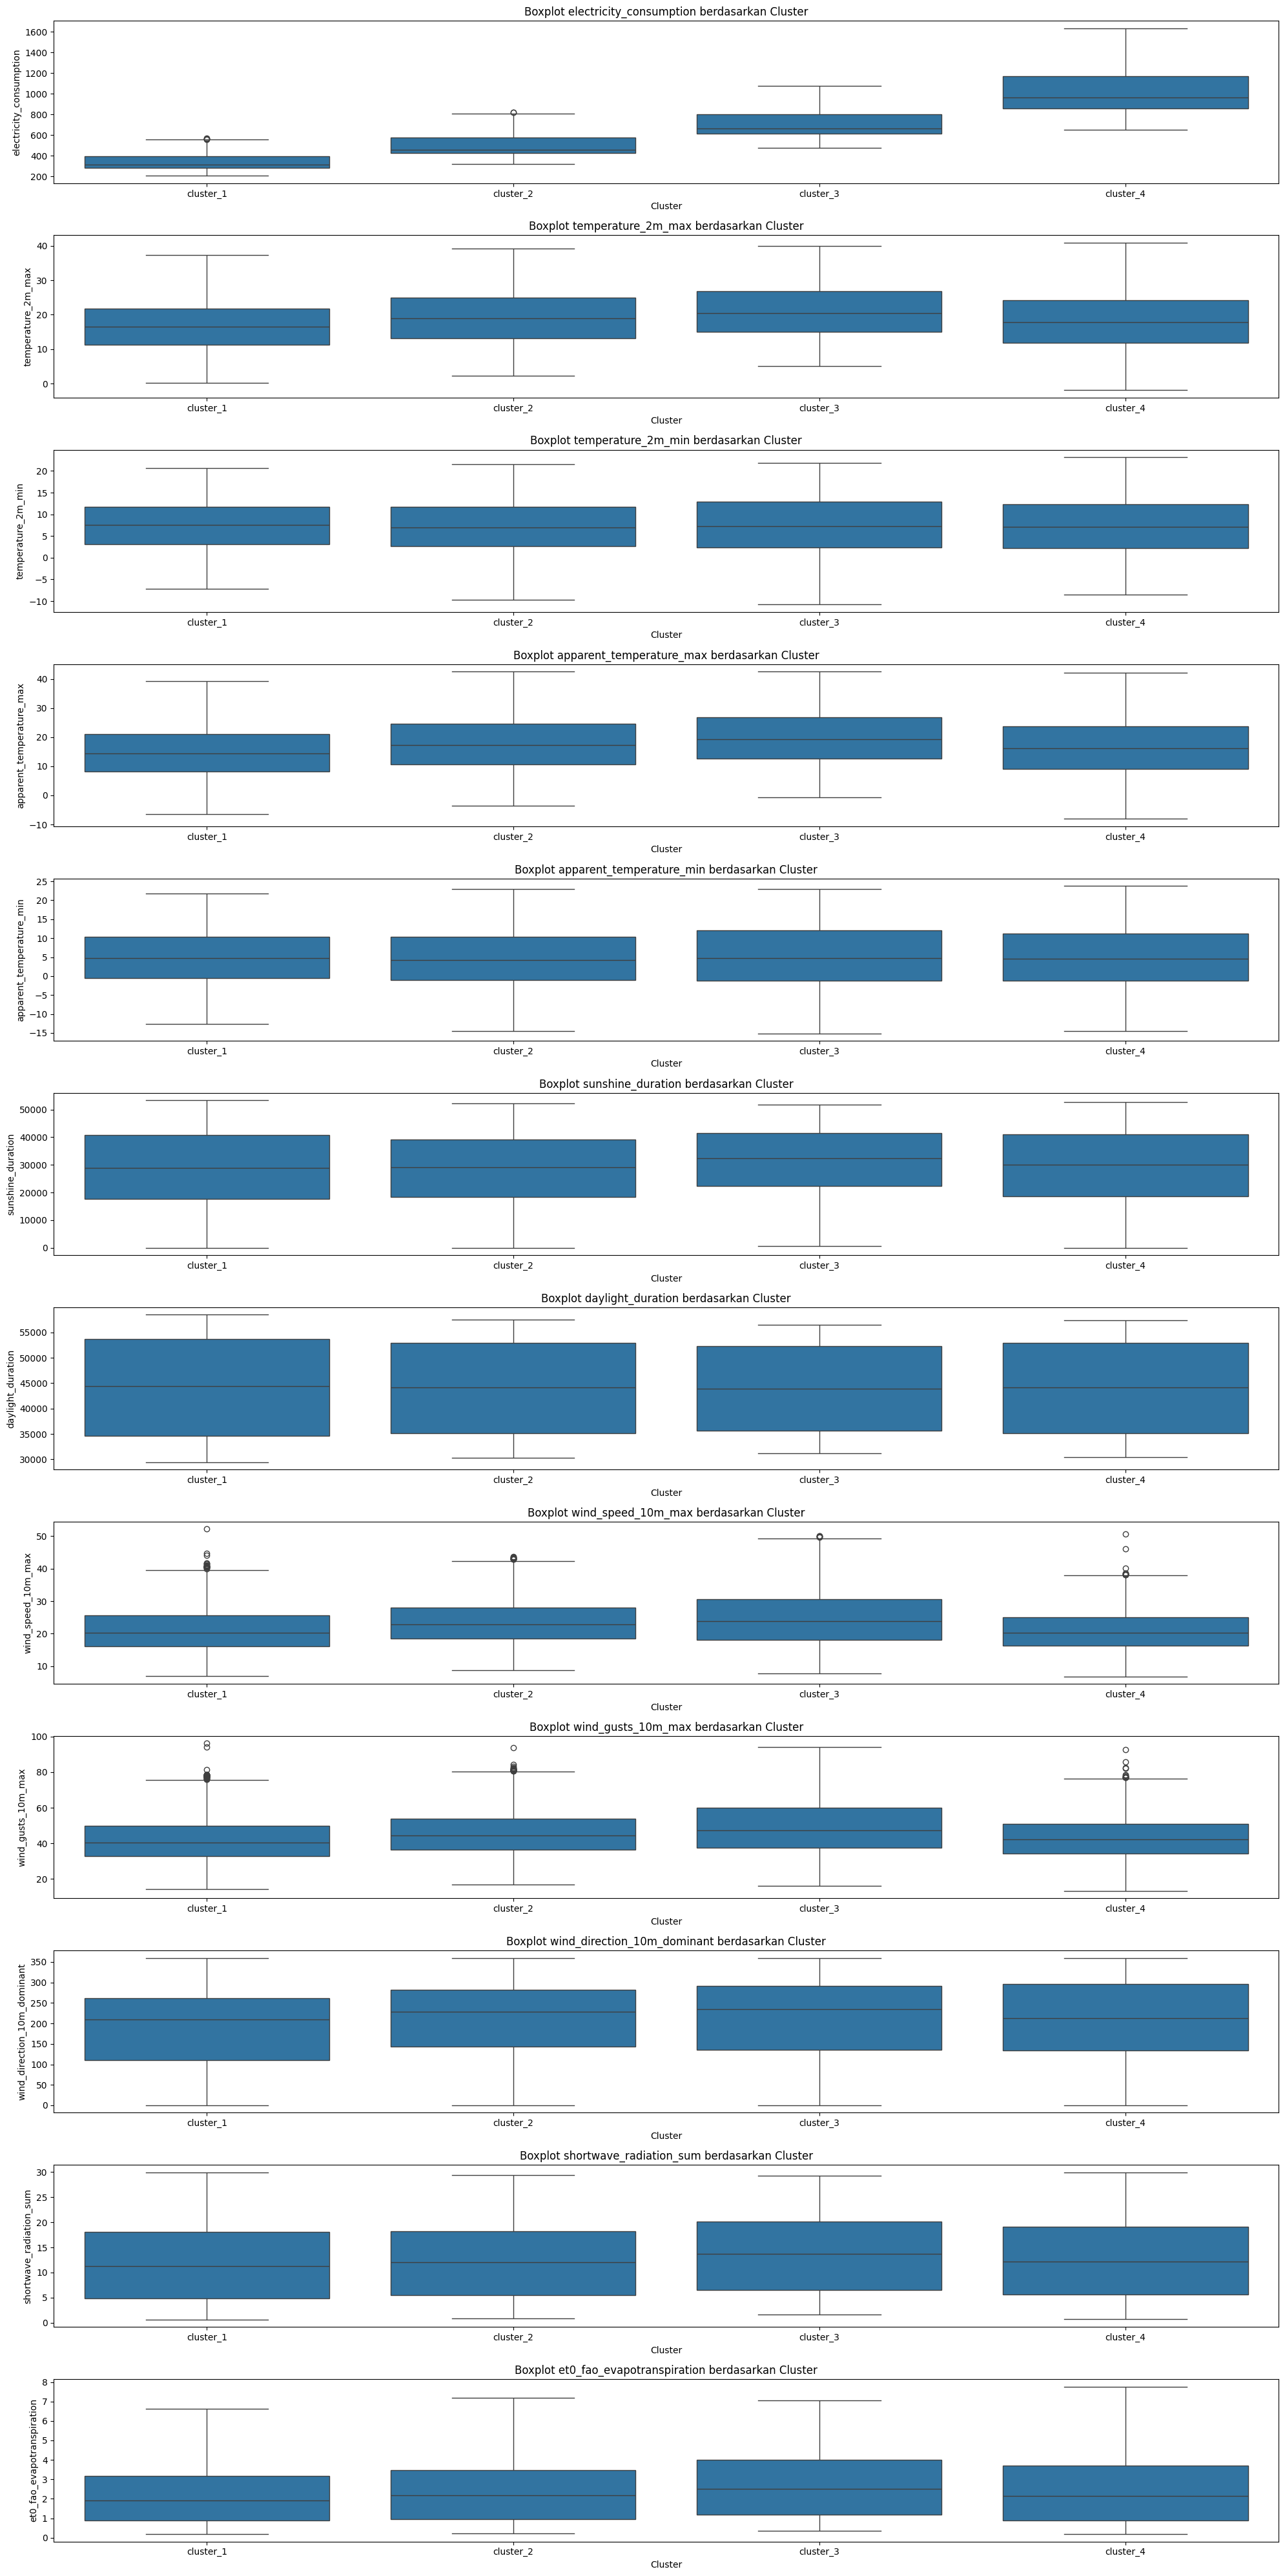

In [ ]:
# Membuat boxplot untuk setiap kolom numerik berdasarkan cluster
plt.figure(figsize=(20, 40))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols), 1, i)
    sns.boxplot(data=final_df, x='cluster_id', y=col)
    plt.title(f'Boxplot {col} berdasarkan Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import lightgbm as lgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Asumsi: final_df dan df_test_filled sudah dimuat sebelumnya.

# 1️⃣ Pra-pemrosesan Data (Lanjutan)
final_df['date'] = pd.to_datetime(final_df['date'])
df_test_filled['date'] = pd.to_datetime(df_test_filled['date'])

def create_time_features(df):
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['dayofweek'] = df['date'].dt.dayofweek
    df['dayofyear'] = df['date'].dt.dayofyear
    df['is_weekend'] = (df['date'].dt.dayofweek >= 5).astype(int)
    df['weekofyear'] = df['date'].dt.isocalendar().week.astype(int)
    return df

final_df = create_time_features(final_df)
df_test_filled = create_time_features(df_test_filled)

# 2️⃣ Feature Engineering (Per Cluster) - Lag dan Rolling Features
def create_lag_rolling_features_per_cluster(df, lag_features, rolling_features, is_train=True):
    df_with_features = df.copy()
    # Pastikan diurutkan untuk lag/rolling yang benar
    df_with_features = df_with_features.sort_values(by=['cluster_id', 'date'])

    # Simpan hasil per cluster untuk digabungkan nanti agar lebih cepat
    cluster_dfs = []
    for cluster_id in df_with_features['cluster_id'].unique():
        cluster_mask = (df_with_features['cluster_id'] == cluster_id)
        cluster_df = df_with_features[cluster_mask].copy()

        # Lag features
        for col, lags in lag_features.items():
            if col == 'electricity_consumption' and not is_train:
                continue
            for lag in lags:
                cluster_df[f'{col}_lag_{lag}'] = cluster_df[col].shift(lag)

        # Rolling features
        for col, windows in rolling_features.items():
            if col == 'electricity_consumption' and not is_train:
                continue
            for window in windows:
                cluster_df[f'{col}_rolling_mean_{window}'] = cluster_df[col].rolling(window=window, min_periods=1).mean()
                cluster_df[f'{col}_rolling_std_{window}'] = cluster_df[col].rolling(window=window, min_periods=1).std()

        cluster_dfs.append(cluster_df)

    # Gabungkan semua cluster yang sudah diberi fitur
    final_featured_df = pd.concat(cluster_dfs)

    # PERBAIKAN: Penanganan NaN yang lebih baik. Backfill dulu, baru isi sisanya dengan 0.
    final_featured_df = final_featured_df.bfill().fillna(0)

    return final_featured_df

# Contoh lag dan rolling window
lag_features = {'electricity_consumption': [1, 7, 30], 'temperature_2m_max': [1, 7]}
rolling_features = {'electricity_consumption': [7, 30], 'temperature_2m_max': [7]}

final_df = create_lag_rolling_features_per_cluster(final_df, lag_features, rolling_features, is_train=True)
df_test_filled = create_lag_rolling_features_per_cluster(df_test_filled, lag_features, rolling_features, is_train=False)

# ⭐ PERBAIKAN UTAMA: Kecualikan 'ID' dari daftar fitur ⭐
features = [col for col in final_df.columns if col not in ['date', 'cluster_id', 'electricity_consumption', 'ID']]
target = 'electricity_consumption'

# 3️⃣ Data Splitting untuk Validasi Internal (Per Cluster)
train_start_date = '2014-01-01'
train_end_date = '2019-12-31'
val_start_date = '2020-01-01'
val_end_date = '2021-12-31'

cluster_models = {}
cluster_metrics = {}

# 4️⃣ Modeling Per Cluster
print("Memulai pelatihan model per cluster...")
for cluster_id in sorted(final_df['cluster_id'].unique()):
    print(f"Melatih model untuk Cluster {cluster_id}...")
    cluster_data = final_df[final_df['cluster_id'] == cluster_id]

    train_split = cluster_data[(cluster_data['date'] >= train_start_date) & (cluster_data['date'] <= train_end_date)]
    val_split = cluster_data[(cluster_data['date'] >= val_start_date) & (cluster_data['date'] <= val_end_date)]

    X_train = train_split[features]
    y_train = train_split[target]
    X_val = val_split[features]
    y_val = val_split[target]

    if X_train.empty or X_val.empty:
        print(f"Tidak cukup data di Cluster {cluster_id} untuk validasi. Melewati.")
        continue

    model = lgb.LGBMRegressor(random_state=42, n_estimators=1000, learning_rate=0.05, n_jobs=-1)
    model.fit(X_train, y_train,
              eval_set=[(X_val, y_val)],
              eval_metric='rmse',
              callbacks=[lgb.early_stopping(stopping_rounds=50, verbose=False)])

    y_pred_val = model.predict(X_val)
    mae = mean_absolute_error(y_val, y_pred_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))

    cluster_metrics[cluster_id] = {'MAE': mae, 'RMSE': rmse}
    cluster_models[cluster_id] = model
    print(f"Cluster {cluster_id} - MAE: {mae:.2f}, RMSE: {rmse:.2f}")

print("\nMetrik Validasi Per Cluster:")
print(pd.DataFrame(cluster_metrics).T)

# GANTI BAGIAN LANGKAH 5 & 6 DENGAN KODE DI BAWAH INI

# 5️⃣ Final Training dan Prediksi Per Cluster pada data test
print("\nMelakukan pelatihan final dan prediksi pada data test per cluster...")

# ⭐ PERBAIKAN: Definisikan fitur yang tersedia di data test.
# Fitur ini tidak boleh mengandung lag/rolling dari target 'electricity_consumption'.
features_for_final_model = [f for f in features if not f.startswith('electricity_consumption_')]
print(f"\nJumlah fitur untuk model final: {len(features_for_final_model)}")
print("Fitur yang bergantung pada target (lag/rolling) telah dikecualikan untuk model final.")


list_of_predictions = []
cluster_feature_importances = {}

for cluster_id in sorted(df_test_filled['cluster_id'].unique()):
    print(f"Memprediksi untuk Cluster {cluster_id}...")

    # Retrain model menggunakan seluruh data train (2014-2021) untuk cluster ini
    # ⭐ PERBAIKAN: Gunakan features_for_final_model
    cluster_full_train_data = final_df[final_df['cluster_id'] == cluster_id]
    X_full_train = cluster_full_train_data[features_for_final_model]
    y_full_train = cluster_full_train_data[target]

    if X_full_train.empty:
        print(f"Tidak ada data train untuk Cluster {cluster_id}. Melewati.")
        continue

    # Tentukan model untuk prediksi final
    if cluster_id in cluster_models:
        # Kita tidak bisa menggunakan 'best_iteration_' karena set fiturnya berbeda.
        # Jadi kita latih ulang dengan jumlah estimator yang wajar.
        model_to_predict = lgb.LGBMRegressor(random_state=42, n_estimators=1000, learning_rate=0.05, n_jobs=-1, objective='regression')
    else:
        print(f"Model untuk Cluster {cluster_id} tidak divalidasi. Training model baru.")
        model_to_predict = lgb.LGBMRegressor(random_state=42, n_estimators=1000, learning_rate=0.05, n_jobs=-1, objective='regression')

    # ⭐ PERBAIKAN: Latih model HANYA dengan fitur yang aman
    model_to_predict.fit(X_full_train, y_full_train)

    # Ambil data test untuk cluster ini
    cluster_test_data = df_test_filled[df_test_filled['cluster_id'] == cluster_id]

    # ⭐ PERBAIKAN: Gunakan features_for_final_model untuk data test juga
    X_test_cluster = cluster_test_data[features_for_final_model]

    if X_test_cluster.empty:
        print(f"Tidak ada data test untuk Cluster {cluster_id}. Melewati.")
        continue

    # Prediksi pada data test
    predictions = model_to_predict.predict(X_test_cluster)
    predictions[predictions < 0] = 0

    # Bawa kolom ID untuk memastikan tidak ada misalignment
    prediction_df = pd.DataFrame({'ID': cluster_test_data['ID'], 'predicted_electricity_consumption': predictions})
    list_of_predictions.append(prediction_df)

    if hasattr(model_to_predict, 'feature_importances_'):
        cluster_feature_importances[cluster_id] = pd.Series(model_to_predict.feature_importances_, index=features_for_final_model).sort_values(ascending=False)

# 6️⃣ Output
# Gabungkan semua prediksi dan urutkan berdasarkan ID asli dari test set
all_test_predictions = pd.concat(list_of_predictions)
submission_df = df_test_filled[['ID']].merge(all_test_predictions, on='ID', how='left')
submission_df.rename(columns={'predicted_electricity_consumption': 'electricity_consumption'}, inplace=True)

# Isi prediksi yang mungkin hilang (jika ada cluster di test tapi tidak di train) dengan nilai 0
submission_df['electricity_consumption'].fillna(0, inplace=True)

submission_df.to_csv('submission.csv', index=False)
print("\nPrediksi selesai. Hasil disimpan di submission.csv")
print(submission_df.head())

# Kode untuk visualisasi di langkah ke-7 bisa tetap sama.

# 7️⃣ Visualisasi (Kode visualisasi Anda sudah cukup baik dan akan berjalan setelah perbaikan di atas)
# Disarankan untuk menjalankan visualisasi di sel terpisah agar lebih rapi.

Memulai pelatihan model per cluster...
Melatih model untuk Cluster cluster_1...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000992 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5774
[LightGBM] [Info] Number of data points in the train set: 2082, number of used features: 28
[LightGBM] [Info] Start training from score 338.943299
Cluster cluster_1 - MAE: 8.27, RMSE: 12.17
Melatih model untuk Cluster cluster_2...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000727 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5794
[LightGBM] [Info] Number of data points in the train set: 2099, number of used features: 28
[LightGBM] [Info] Start training from score 502.636581
Cluster cluster_2 - MAE: 11.33, RMSE: 15.64
Melatih model untuk Cluster cluster_3...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the ove

/tmp/ipython-input-9-3661000929.py:185: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  submission_df['electricity_consumption'].fillna(0, inplace=True)


In [10]:
# 6️⃣ Output
# Gabungkan semua prediksi dan urutkan berdasarkan ID asli dari test set
all_test_predictions = pd.concat(list_of_predictions)

# Pastikan ID di submission_df sesuai dengan urutan ID di df_test_filled
# Karena df_test_filled memiliki ID asli dari file test.csv
submission_df = df_test_filled[['ID']].merge(all_test_predictions, on='ID', how='left')

# Rename kolom sesuai format output yang diminta
submission_df.rename(columns={'predicted_electricity_consumption': 'predicted_electricity_consumption'}, inplace=True)

# Isi prediksi yang mungkin hilang (jika ada cluster di test tapi tidak di train) dengan nilai 0
submission_df['predicted_electricity_consumption'].fillna(0, inplace=True)

# Pastikan kolom sesuai urutan ID,predicted_electricity_consumption
submission_df = submission_df[['ID', 'predicted_electricity_consumption']]

# Simpan ke file CSV
submission_df.to_csv('submission.csv', index=False)

print("\nPrediksi selesai. Hasil disimpan di submission.csv")
print(submission_df.head())

# Kode untuk visualisasi di langkah ke-7 bisa tetap sama.

# 7️⃣ Visualisasi (Kode visualisasi Anda sudah cukup baik dan akan berjalan setelah perbaikan di atas)
# Disarankan untuk menjalankan visualisasi di sel terpisah agar lebih rapi.

# Untuk visualisasi feature importances (opsional)
# if cluster_feature_importances:
#     print("\nFeature Importances per Cluster:")
#     for cluster_id, importances in cluster_feature_importances.items():
#         print(f"\nCluster {cluster_id}:")
#         print(importances.head(10)) # Tampilkan 10 fitur teratas


Prediksi selesai. Hasil disimpan di submission.csv
                     ID  predicted_electricity_consumption
0  cluster_1_2022-01-01                         323.368712
1  cluster_1_2022-01-02                         316.958816
2  cluster_1_2022-01-03                         375.491496
3  cluster_1_2022-01-04                         397.876079
4  cluster_1_2022-01-05                         419.558522


In [11]:
# prompt: buat urutan submission.csv dengan urutan seperti dibawah
# ID,predicted_electricity_consumption
# cluster_1_2022-01-01,341.16104481048114
# cluster_2_2022-01-01,517.4668248756482
# cluster_3_2022-01-01,700.808550395189
# cluster_4_2022-01-01,1000.7844653228218
# cluster_1_2022-01-02,368.5277270105335
# cluster_2_2022-01-02,531.7063363109936
# cluster_3_2022-01-02,728.0298888139482
# cluster_4_2022-01-02,1043.0929696585863
# dan seterusnya sampai 2024

# GANTI BAGIAN LANGKAH 5 & 6 DENGAN KODE DI BAWAH INI

# 5️⃣ Final Training dan Prediksi Per Cluster pada data test
print("\nMelakukan pelatihan final dan prediksi pada data test per cluster...")

# ⭐ PERBAIKAN: Definisikan fitur yang tersedia di data test.
# Fitur ini tidak boleh mengandung lag/rolling dari target 'electricity_consumption'.
# Cari semua kolom di df_test_filled yang BUKAN 'date', 'cluster_id', atau 'ID'.
features_for_final_model = [col for col in df_test_filled.columns if col not in ['date', 'cluster_id', 'ID']]

# Hapus fitur yang dimulai dengan 'electricity_consumption_' karena ini adalah lag/rolling target
features_for_final_model = [f for f in features_for_final_model if not f.startswith('electricity_consumption_')]


print(f"\nJumlah fitur untuk model final: {len(features_for_final_model)}")
print("Fitur yang bergantung pada target (lag/rolling) telah dikecualikan untuk model final.")


list_of_predictions = []
cluster_feature_importances = {}

for cluster_id in sorted(df_test_filled['cluster_id'].unique()):
    print(f"Memprediksi untuk Cluster {cluster_id}...")

    # Retrain model menggunakan seluruh data train (2014-2021) untuk cluster ini
    # ⭐ PERBAIKAN: Gunakan features_for_final_model
    cluster_full_train_data = final_df[final_df['cluster_id'] == cluster_id]
    X_full_train = cluster_full_train_data[features_for_final_model]
    y_full_train = cluster_full_train_data[target]

    if X_full_train.empty:
        print(f"Tidak ada data train untuk Cluster {cluster_id}. Melewati.")
        continue

    # Tentukan model untuk prediksi final
    # Gunakan hyperparameter yang sama dengan model validasi jika tersedia
    if cluster_id in cluster_models:
         model_to_predict = lgb.LGBMRegressor(random_state=42, n_estimators=cluster_models[cluster_id].best_iteration_, learning_rate=0.05, n_jobs=-1, objective='regression')
    else:
        print(f"Model untuk Cluster {cluster_id} tidak divalidasi atau tidak ditemukan. Training model baru dengan n_estimators=1000.")
        model_to_predict = lgb.LGBMRegressor(random_state=42, n_estimators=1000, learning_rate=0.05, n_jobs=-1, objective='regression')

    # ⭐ PERBAIKAN: Latih model HANYA dengan fitur yang aman
    model_to_predict.fit(X_full_train, y_full_train)

    # Ambil data test untuk cluster ini
    cluster_test_data = df_test_filled[df_test_filled['cluster_id'] == cluster_id]

    # ⭐ PERBAIKAN: Gunakan features_for_final_model untuk data test juga
    X_test_cluster = cluster_test_data[features_for_final_model]

    if X_test_cluster.empty:
        print(f"Tidak ada data test untuk Cluster {cluster_id}. Melewati.")
        continue

    # Prediksi pada data test
    predictions = model_to_predict.predict(X_test_cluster)
    predictions[predictions < 0] = 0

    # Bawa kolom ID untuk memastikan tidak ada misalignment
    prediction_df = pd.DataFrame({'ID': cluster_test_data['ID'], 'predicted_electricity_consumption': predictions})
    list_of_predictions.append(prediction_df)

    if hasattr(model_to_predict, 'feature_importances_'):
        # Pastikan indeks feature importances sesuai dengan features_for_final_model
        cluster_feature_importances[cluster_id] = pd.Series(model_to_predict.feature_importances_, index=features_for_final_model).sort_values(ascending=False)

# 6️⃣ Output
# Gabungkan semua prediksi dan urutkan berdasarkan ID asli dari test set
all_test_predictions = pd.concat(list_of_predictions)

# Pastikan ID di submission_df sesuai dengan urutan ID di df_test_filled
# Karena df_test_filled memiliki ID asli dari file test.csv
# Gunakan merge untuk menjaga urutan dari df_test_filled['ID']
submission_df = df_test_filled[['ID']].merge(all_test_predictions, on='ID', how='left')

# Rename kolom sesuai format output yang diminta
submission_df.rename(columns={'predicted_electricity_consumption': 'predicted_electricity_consumption'}, inplace=True)

# Isi prediksi yang mungkin hilang (jika ada cluster di test tapi tidak di train) dengan nilai 0
submission_df['predicted_electricity_consumption'].fillna(0, inplace=True)

# Pastikan kolom sesuai urutan ID,predicted_electricity_consumption
submission_df = submission_df[['ID', 'predicted_electricity_consumption']]

# Simpan ke file CSV
submission_df.to_csv('submission.csv', index=False)

print("\nPrediksi selesai. Hasil disimpan di submission.csv")
print(submission_df.head())

# Kode untuk visualisasi di langkah ke-7 bisa tetap sama.

# 7️⃣ Visualisasi (Kode visualisasi Anda sudah cukup baik dan akan berjalan setelah perbaikan di atas)
# Disarankan untuk menjalankan visualisasi di sel terpisah agar lebih rapi.

# Untuk visualisasi feature importances (opsional)
# if cluster_feature_importances:
#     print("\nFeature Importances per Cluster:")
#     for cluster_id, importances in cluster_feature_importances.items():
#         print(f"\nCluster {cluster_id}:")
#         print(importances.head(10)) # Tampilkan 10 fitur teratas



Melakukan pelatihan final dan prediksi pada data test per cluster...

Jumlah fitur untuk model final: 21
Fitur yang bergantung pada target (lag/rolling) telah dikecualikan untuk model final.
Memprediksi untuk Cluster cluster_1...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002220 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4018
[LightGBM] [Info] Number of data points in the train set: 2884, number of used features: 21
[LightGBM] [Info] Start training from score 338.544764
Memprediksi untuk Cluster cluster_2...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000781 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4023
[LightGBM] [Info] Number of data points in the train set: 2915, number of used features: 21
[LightGBM] [Info] Start training from score 500.373800
Memprediksi untuk Cluster cluster_3...
[Ligh

/tmp/ipython-input-11-1674357951.py:93: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  submission_df['predicted_electricity_consumption'].fillna(0, inplace=True)


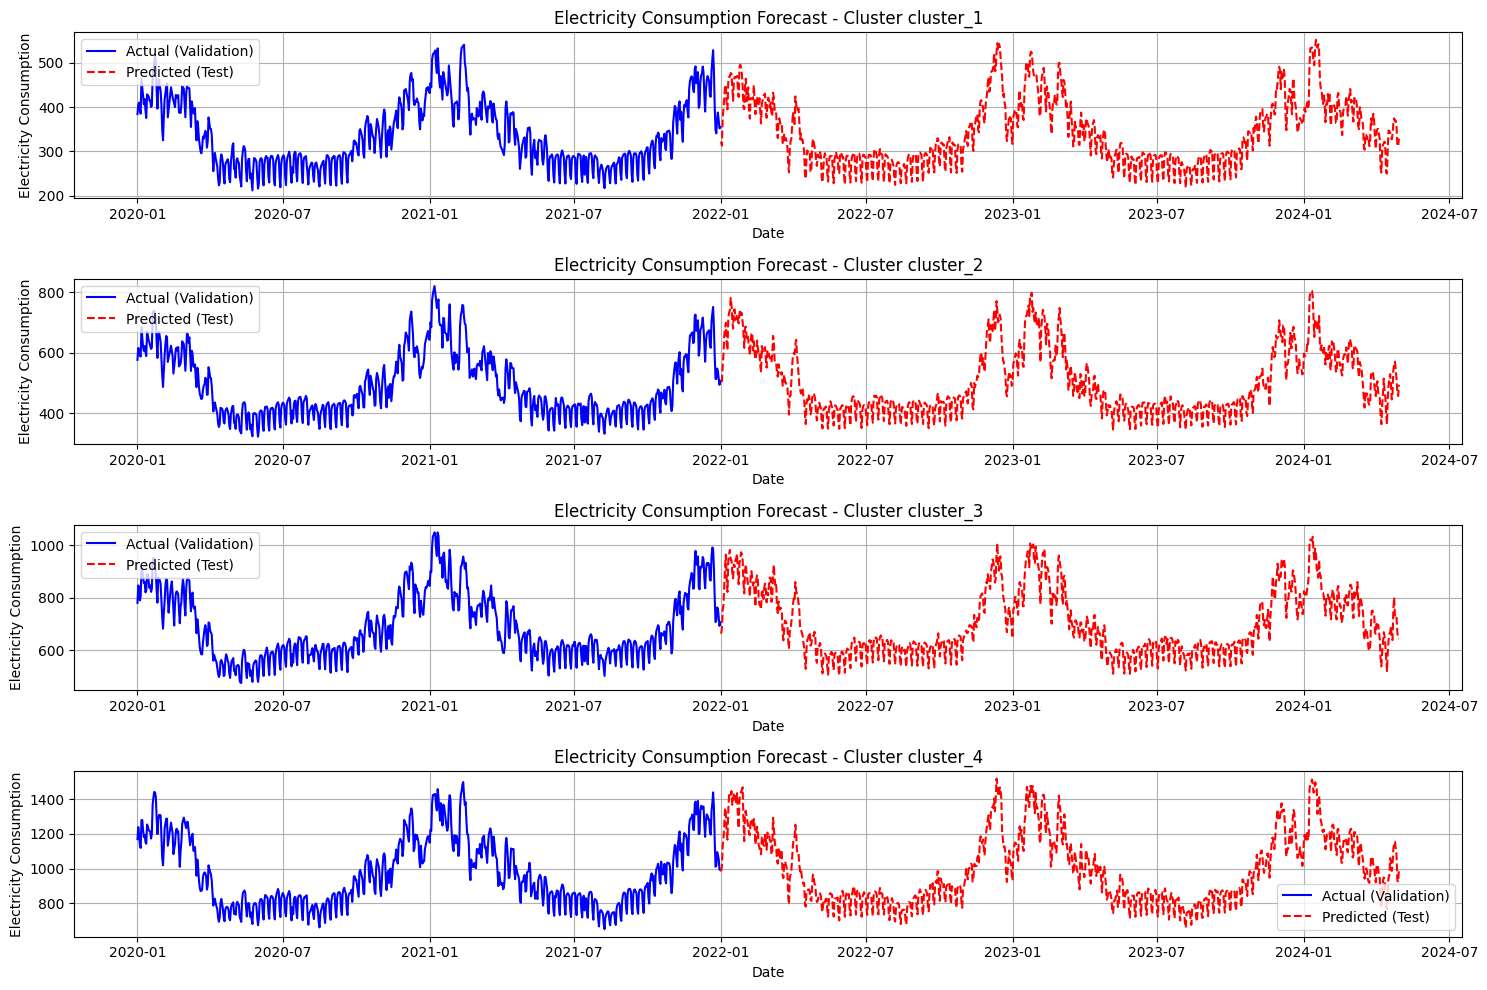

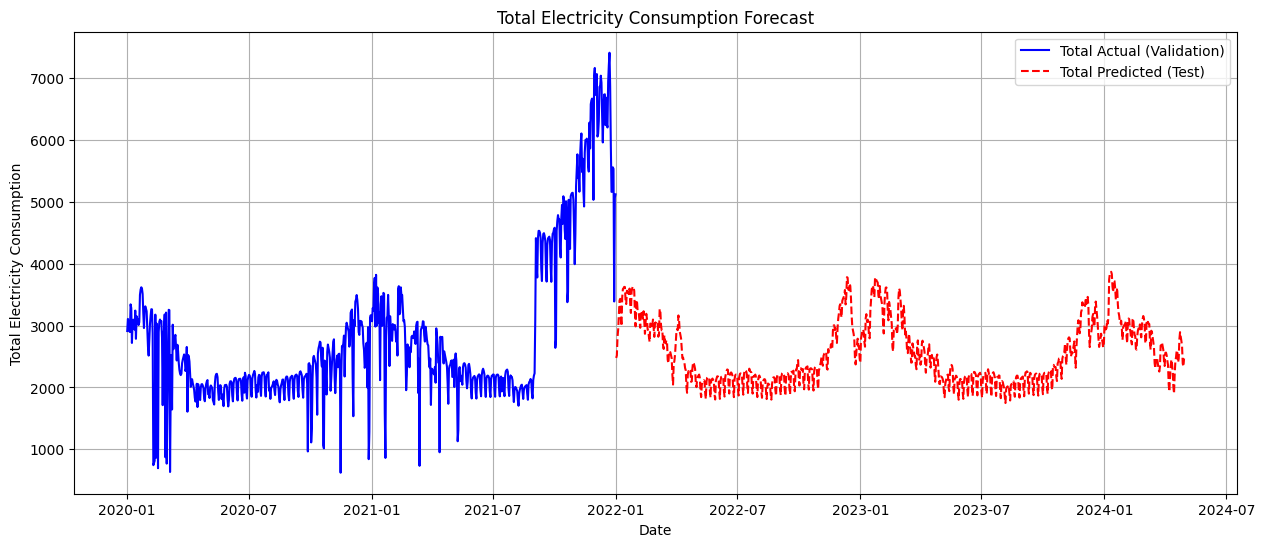


Visualisasi hasil forecasting selesai.


In [12]:
# prompt: buatkan visualisasi hasil forecastingnya

# 7️⃣ Visualisasi Hasil Forecasting

# Gabungkan data aktual dari train (untuk rentang validasi) dan data prediksi test
# Ambil data aktual dari rentang validasi dari final_df
actual_val_data = final_df[(final_df['date'] >= val_start_date) & (final_df['date'] <= val_end_date)][['date', 'cluster_id', 'electricity_consumption']].copy()
actual_val_data.rename(columns={'electricity_consumption': 'actual_consumption'}, inplace=True)

# Ambil data prediksi dari submission_df dan gabungkan dengan tanggal dan cluster dari df_test_filled
predicted_test_data = submission_df.merge(df_test_filled[['ID', 'date', 'cluster_id']], on='ID', how='left')
predicted_test_data.rename(columns={'predicted_electricity_consumption': 'predicted_consumption'}, inplace=True)
predicted_test_data = predicted_test_data[['date', 'cluster_id', 'predicted_consumption']]

# Gabungkan data aktual dan prediksi untuk visualisasi
# Kita perlu memikirkan cara terbaik untuk menampilkan ini.
# Opsi 1: Visualisasi per cluster
# Opsi 2: Visualisasi total konsumsi

# Opsi 1: Visualisasi per cluster (Contoh untuk beberapa cluster pertama)
clusters_to_visualize = sorted(final_df['cluster_id'].unique())[:5] # Ambil 5 cluster pertama

plt.figure(figsize=(15, 10))

for i, cluster_id in enumerate(clusters_to_visualize):
    plt.subplot(len(clusters_to_visualize), 1, i + 1)

    # Data Aktual (Validasi)
    cluster_actual = actual_val_data[actual_val_data['cluster_id'] == cluster_id]
    plt.plot(cluster_actual['date'], cluster_actual['actual_consumption'], label='Actual (Validation)', color='blue')

    # Data Prediksi (Test)
    cluster_predicted = predicted_test_data[predicted_test_data['cluster_id'] == cluster_id]
    plt.plot(cluster_predicted['date'], cluster_predicted['predicted_consumption'], label='Predicted (Test)', color='red', linestyle='--')

    plt.title(f'Electricity Consumption Forecast - Cluster {cluster_id}')
    plt.xlabel('Date')
    plt.ylabel('Electricity Consumption')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

# Opsi 2: Visualisasi Total Konsumsi (Mengagregasi per tanggal)
# Aggregasi data aktual (validasi) per tanggal
total_actual_val = actual_val_data.groupby('date')['actual_consumption'].sum().reset_index()

# Aggregasi data prediksi (test) per tanggal
total_predicted_test = predicted_test_data.groupby('date')['predicted_consumption'].sum().reset_index()

plt.figure(figsize=(15, 6))

plt.plot(total_actual_val['date'], total_actual_val['actual_consumption'], label='Total Actual (Validation)', color='blue')
plt.plot(total_predicted_test['date'], total_predicted_test['predicted_consumption'], label='Total Predicted (Test)', color='red', linestyle='--')

plt.title('Total Electricity Consumption Forecast')
plt.xlabel('Date')
plt.ylabel('Total Electricity Consumption')
plt.legend()
plt.grid(True)
plt.show()

print("\nVisualisasi hasil forecasting selesai.")
